In [21]:
from astropy.io import fits
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

import math
%matplotlib inline
from astropy.wcs import WCS
from astropy import units as u

import pandas as pd
from astropy.coordinates import Angle
import myfunc as mf

path = '/Users/anshu/Documents/work/cluster_projects/mosel/'
pathout = path+'SED_fit/fast_outputs/'
vel_light = 299792.458 

In [14]:
from astropy.cosmology import WMAP9 as cosmo

In [15]:
flam = 4e-21*u.erg/u.second/u.cm**2/u.angstrom
lam = 1500*u.Angstrom
z=6.74
dis = cosmo.luminosity_distance(z)
llam = flam*4*math.pi*dis**2
c = vel_light*u.km/u.second
lnu = lam**2*llam/c
lnu = lnu.to(u.erg/u.second/u.Hz)

In [16]:
lhb = 0.38e42*u.erg/u.second
cont = 4.86e-13*u.erg
sion = np.log10((lhb/(cont*lnu)).value)
print(sion)

26.675969838179554


In [94]:
df = pd.read_csv('/Users/anshu/Documents/work/cluster_projects/mosel/ravi_project/EELG_coords.dat')

In [95]:
color = ['White', 'Red', 'Green', 'Blue', 'Cyan', 'Magenta','Yellow']
filename = '/Users/anshu/Documents/work/cluster_projects/mosel/ravi_project/EELGS_mod.reg'
f = open(filename, 'w')
#comment = '# Region file format: DS9 version 4.1 \nglobal color=Magenta dashlist=8 3 width=2 font="helvetica 14 bold roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nfk5 \n'
#f.write(comment)
RA = df['ra']
ID = df['id']
DEC = df['dec']
z = df['redshift']
RA_mod = ['circle('+str(x) for x in RA]
DEC_mod = [str(x) for x in DEC]
z_mod = []
for i in range(len(ID)):
    z_mod.append(f'3.000") # font=\'helvetica 9 bold roman\' text= {"{"} ID, z = {ID[i]} {","} {str(mf.round_sigfigs(z[i],4))} {"}"}')

df_out = pd.DataFrame(zip(RA_mod, DEC_mod, z_mod), columns = ['RA','DEC', 'size'])
df_out.to_csv(filename, index=None, header=None, quotechar=';')
f.close()

In [96]:
sn_fors = pd.read_csv('/Users/anshu/Documents/work/cluster_projects/mosel/ravi_project/FORS2_sn2_fli_0.3.dat', skiprows=1, delim_whitespace=True)


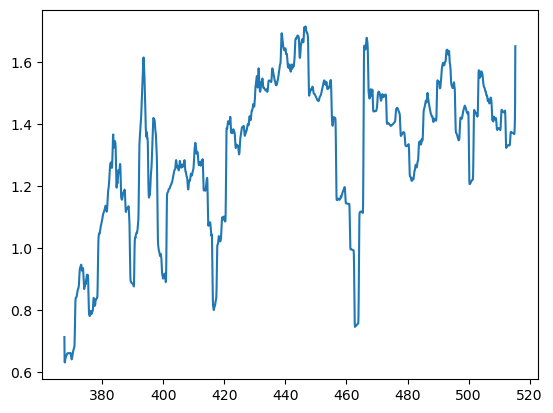

In [97]:
plt.plot(sn_fors['wave'], sn_fors['sn'])

In [98]:
wv = sn_fors['wave']
z = 3.4
wv_lyc = 91.2 *(1+z)


In [99]:
pix_lyc = len(sn_fors[sn_fors['wave']<wv_lyc]['wave'])
pix_stellar = len(sn_fors[sn_fors['wave']>wv_lyc]['wave'])

avg_sn_lyc = np.median(sn_fors[sn_fors['wave']<wv_lyc]['sn'])
avg_sn_stellar = np.median(sn_fors[sn_fors['wave']>wv_lyc]['sn'])


In [100]:
pix_lyc, pix_stellar, avg_sn_stellar, avg_sn_lyc

(467, 1584, 1.4180899999999999, 1.0497)

In [101]:
cont_st_sn = avg_sn_stellar*np.sqrt(pix_stellar)*np.sqrt(8)
cont_lyc_sn = np.sqrt(pix_lyc)*0.1*avg_sn_lyc*np.sqrt(8)

In [102]:
cont_lyc_sn, cont_st_sn

(6.4160631669583825, 159.63436043635215)

In [103]:
sn_fors_600b = pd.read_csv('/Users/anshu/Documents/work/cluster_projects/mosel/ravi_project/FORS2_sn_gris_600b.dat',  delim_whitespace=True)


In [104]:
pix_lyc = len(sn_fors_600b[sn_fors_600b['wave']<wv_lyc]['wave'])
pix_stellar = len(sn_fors_600b[sn_fors_600b['wave']>wv_lyc]['wave'])

avg_sn_lyc = np.median(sn_fors_600b[sn_fors_600b['wave']<wv_lyc]['sn'])
avg_sn_stellar = np.median(sn_fors_600b[sn_fors_600b['wave']>wv_lyc]['sn'])


In [105]:
pix_lyc, pix_stellar, avg_sn_stellar, avg_sn_lyc

(511, 1539, 1.65868, 0.880305)

In [106]:
cont_st_sn = avg_sn_stellar*np.sqrt(pix_stellar)*np.sqrt(8)
cont_lyc_sn = np.sqrt(pix_lyc)*0.1*avg_sn_lyc*np.sqrt(8)

In [107]:
cont_lyc_sn, cont_st_sn

(5.628447404645619, 184.0462239320025)

In [108]:
sn_fors_300v = pd.read_csv('/Users/anshu/Documents/work/cluster_projects/mosel/ravi_project/FORS2_sn_gris_300v.dat',  delim_whitespace=True)


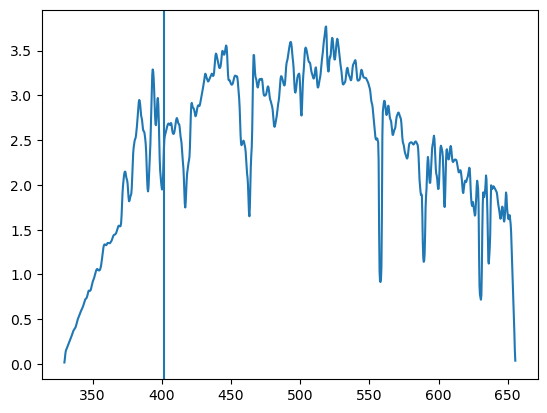

In [115]:
plt.plot(sn_fors_300v['wave'], sn_fors_300v['sn'])
plt.axvline(wv_lyc)

In [110]:
pix_lyc = len(sn_fors_300v[sn_fors_300v['wave']<wv_lyc]['wave'])
pix_stellar = len(sn_fors_300v[sn_fors_300v['wave']>wv_lyc]['wave'])

avg_sn_lyc = np.median(sn_fors_300v[sn_fors_300v['wave']<wv_lyc]['sn'])
avg_sn_stellar = np.median(sn_fors_300v[sn_fors_300v['wave']>wv_lyc]['sn'])


In [111]:
pix_lyc, pix_stellar, avg_sn_stellar, avg_sn_lyc

(214, 757, 2.77462, 1.4403000000000001)

In [116]:
cont_st_sn = avg_sn_stellar*np.sqrt(pix_stellar)
cont_lyc_sn = np.sqrt(pix_lyc)*avg_sn_lyc
fesc = 0.1 ### 10 % escape fraction
cont_lyc_sn = fesc*cont_lyc_sn

In [121]:
Nobs = 8 ### Number of observing blocks
cont_lyc_sn*np.sqrt(Nobs), cont_st_sn*np.sqrt(Nobs)

(5.9594316189381695, 215.9217769713986)

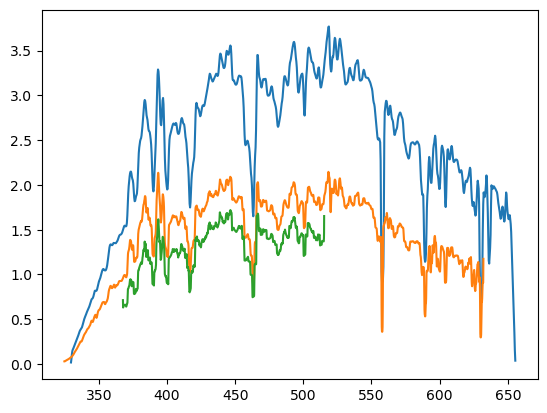

In [114]:
plt.plot(sn_fors_300v['wave'], sn_fors_300v['sn'])
plt.plot(sn_fors_600b['wave'], sn_fors_600b['sn'])
plt.plot(sn_fors['wave'], sn_fors['sn'])